The data cleaning steps that were done in the Project Phase-1 are used below for the effective computation 

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt


# Step 1: Download the dataset from Kaggle
os.system('kaggle datasets download -d gauravmalik26/food-delivery-dataset')

# Step 2: Extract the ZIP file
with zipfile.ZipFile('food-delivery-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('food_delivery_dataset')

# Step 3: List the files in the extracted directory to find the correct CSV file name
extracted_dir = 'food_delivery_dataset'
files = os.listdir(extracted_dir)
print("Extracted files:", files)

# Step 4: Use the correct file from the extracted list
csv_file_path = f"{extracted_dir}/train.csv"  # Replace with 'train.csv' since it's one of the files

# Step 5: Create a DataFrame from the extracted CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())


# Replacing 'NaN' with NaN.
df = df.replace('NaN', np.nan, regex=True)

print("Finding SUM of Nan values")
# Finding the count of NaN for each column
print(df.isna().sum())
print("------------------------")
print("Finding SUM of 0 values")
# Finding columns with count as 0.
print((df == 0).sum())

threshold = 0.01

# Task 1: Identify the valid range for Restaurant Latitude and Longitude
valid_restaurant_latitude = df[df['Restaurant_latitude'] > threshold]['Restaurant_latitude']
valid_restaurant_longitude = df[df['Restaurant_longitude'] > threshold]['Restaurant_longitude']

# Task 2: Identify the valid range for Delivery Latitude and Longitude
valid_delivery_latitude = df[df['Delivery_location_latitude'] > threshold]['Delivery_location_latitude']
valid_delivery_longitude = df[df['Delivery_location_longitude'] > threshold]['Delivery_location_longitude']

# Task 3: Calculate the min and max for each of the valid columns
min_rest_lat, max_rest_lat = valid_restaurant_latitude.min(), valid_restaurant_latitude.max()
min_rest_long, max_rest_long = valid_restaurant_longitude.min(), valid_restaurant_longitude.max()
min_del_lat, max_del_lat = valid_delivery_latitude.min(), valid_delivery_latitude.max()
min_del_long, max_del_long = valid_delivery_longitude.min(), valid_delivery_longitude.max()

# Task 4: Replace zero or near-zero values with random values from the respective range
df['Restaurant_latitude'] = df['Restaurant_latitude'].apply(
    lambda x: round(np.random.uniform(min_rest_lat, max_rest_lat), 4) if x <= threshold else x
)
df['Restaurant_longitude'] = df['Restaurant_longitude'].apply(
    lambda x: round(np.random.uniform(min_rest_long, max_rest_long), 4) if x <= threshold else x
)
df['Delivery_location_latitude'] = df['Delivery_location_latitude'].apply(
    lambda x: round(np.random.uniform(min_del_lat, max_del_lat), 4) if x <= threshold else x
)
df['Delivery_location_longitude'] = df['Delivery_location_longitude'].apply(
    lambda x: round(np.random.uniform(min_del_long, max_del_long), 4) if x <= threshold else x
)

# Display the updated DataFrame
print(df[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']])

df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')

# Step 1: Calculate the time difference where "Time Ordered" is not NULL
df['Time_Difference'] = df['Time_Order_picked'] - df['Time_Orderd']

# Step 2: Calculate the average time difference (exclude rows where Time Ordered is NULL)
average_time_diff = df['Time_Difference'].mean()

# Step 3: Replace NULL values in "Time Ordered" by subtracting the average time difference from "Time Packed"
df['Time_Orderd'] = df.apply(
    lambda row: row['Time_Order_picked'] - average_time_diff if pd.isnull(row['Time_Orderd']) else row['Time_Orderd'],
    axis=1
)

# Drop the Time_Difference column if it's no longer needed
df.drop('Time_Difference', axis=1, inplace=True)

# Display the updated DataFrame
print(df[['Time_Orderd', 'Time_Order_picked']])


#Convert 'Delivery_person_Age' to numeric
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')

#Replace null values in 'Delivery_person_Age' with the average
Average_age = df['Delivery_person_Age'].mean()
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(int(Average_age))

#Convert 'Delivery_person_Ratings' to numeric
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

#Replace null values in 'Delivery_person_Ratings' with average(1 decimal point)
Average_rating = df['Delivery_person_Ratings'].mean()
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(round(Average_rating, 1))

#Convert 'Delivery_person_Ratings' to numeric
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')

#Replace null values with the most frequent value which is the mode of the data
most_frequent_value = df['multiple_deliveries'].mode()[0]
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(most_frequent_value)

print(df.head())


Extracted files: ['Sample_Submission.csv', 'test.csv', 'train.csv']
        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_

C:\Users\upata\AppData\Local\Temp\ipykernel_46144\2440362880.py:74: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
C:\Users\upata\AppData\Local\Temp\ipykernel_46144\2440362880.py:75: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')


              Time_Orderd   Time_Order_picked
0     2024-11-05 11:30:00 2024-11-05 11:45:00
1     2024-11-05 19:45:00 2024-11-05 19:50:00
2     2024-11-05 08:30:00 2024-11-05 08:45:00
3     2024-11-05 18:00:00 2024-11-05 18:10:00
4     2024-11-05 13:30:00 2024-11-05 13:45:00
...                   ...                 ...
45588 2024-11-05 11:35:00 2024-11-05 11:45:00
45589 2024-11-05 19:55:00 2024-11-05 20:10:00
45590 2024-11-05 23:50:00 2024-11-05 00:05:00
45591 2024-11-05 13:35:00 2024-11-05 13:40:00
45592 2024-11-05 17:10:00 2024-11-05 17:15:00

[45593 rows x 2 columns]
        ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  34.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  38.0                      4.7   
4  0x70a2     CHENRES12DEL0

### HYPOTHESIS 1 : The delivery timings in the Evening would be higher compared to other parts of the day (like Morning, Afternoon, Night), especially when road traffic density is high or multiple deliveries are being handled by the delivery person.

#### Feature Extraction for the given hypothesis

Categorize the time into 4 parts like Morning, Afternoon, Evening, Night

In [2]:
from datetime import time
from geopy.distance import geodesic

def categorize_time_of_day(order_time):
    if pd.notnull(order_time):
        order_time = pd.to_datetime(order_time)  # Ensure it's in datetime format
        if time(5, 0) <= order_time.time() < time(12, 0):
            return 'Morning'
        elif time(12, 0) <= order_time.time() < time(17, 0):
            return 'Afternoon'
        elif time(17, 0) <= order_time.time() < time(21, 0):
            return 'Evening'
        else:
            return 'Night'
    return np.nan

#Use the function to create a new 'Time_of_Day' column
df['Time_of_Day'] = df['Time_Orderd'].apply(categorize_time_of_day)

#Map time of day to numerical categories for use in model
time_of_day_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}
df['Time_of_Day_Category'] = df['Time_of_Day'].map(time_of_day_mapping)

Calculate the distances using the Haversine formula (Used to Calculate the distance between two points on sphere using the latitudes and longitudes) and create the new distance column

In [3]:
# Step 2: Calculate Distance using Haversine formula
def calculate_distance(row):
    restaurant_location = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_location = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    try:
        return geodesic(restaurant_location, delivery_location).kilometers
    except ValueError:
        return np.nan

df['Distance'] = df.apply(calculate_distance, axis=1)

Normalize the Road_traffic_density column and map them to the numerical values

In [4]:
df['Road_traffic_density'] = df['Road_traffic_density'].str.strip().str.lower()
traffic_mapping = {'low': 1, 'medium': 2, 'high': 3, 'jam': 4}
df['traffic_density_category'] = df['Road_traffic_density'].map(traffic_mapping)

Now we make the interaction features 
First between peak times and high traffic

In [5]:
df['Peak_High_Traffic'] = np.where((df['Time_of_Day_Category'] >= 2) & (df['traffic_density_category'] >= 3), 1, 0)

Interaction between distance and multiple deliveries


In [6]:
df['Distance_Multiple_Deliveries'] = df['Distance'] * pd.to_numeric(df['multiple_deliveries'], errors='coerce').fillna(0)

Interaction between traffic density and distance

In [7]:
df['Traffic_Density_Distance'] = df['traffic_density_category'] * df['Distance']
df['Peak_Multiple_Deliveries'] = np.where((df['Time_of_Day_Category'] >= 2) & (df['multiple_deliveries'] > 1), 1, 0)

clean the values in 'Time_taken(min)' to remove '(min)' and convert to numeric and add the threshholdvalues to judge the high delivery times which is the mean of the delivery times.

In [8]:
df['Time_taken(min)'] = df['Time_taken(min)'].astype(str).str.extract(r'(\d+)').astype(float)
df['High_Delivery_Time'] = df['Time_taken(min)'].apply(lambda x: 1 if x > 35 else 0)

In [9]:
print(df[['Time_of_Day', 'Time_of_Day_Category', 'Distance', 'traffic_density_category', 'multiple_deliveries',
         'Peak_High_Traffic', 'Distance_Multiple_Deliveries', 'Traffic_Density_Distance', 'Time_taken(min)', 
         'High_Delivery_Time']].head())

  Time_of_Day  Time_of_Day_Category   Distance  traffic_density_category  \
0     Morning                     1   3.020737                       3.0   
1     Evening                     3  20.143737                       4.0   
2     Morning                     1   1.549693                       1.0   
3     Evening                     3   7.774497                       2.0   
4   Afternoon                     2   6.197898                       3.0   

   multiple_deliveries  Peak_High_Traffic  Distance_Multiple_Deliveries  \
0                  0.0                  0                      0.000000   
1                  1.0                  1                     20.143737   
2                  1.0                  0                      1.549693   
3                  1.0                  0                      7.774497   
4                  1.0                  1                      6.197898   

   Traffic_Density_Distance  Time_taken(min)  High_Delivery_Time  
0                  9.0622

### Model Building

Why Decision tree?

For my hypothesis we need 

Managing both Continuous and Categorical Features: 

Decision trees are best suitable manage both kinds of features like continuous variables such as distance and categorical variables time of day, city.

Decision trees are best suited in spotting patterns in data, particularly when dealing with features that interact as we have added some interaction features so it is best suited, such as heavy traffic and peak hours, multiple deliveries.

Decision trees gives how decisions are made so that we can identify the characteristics and the durations of delivery time can be clearly observed.

For our hypothesis we need the delivery time to be classified as hoigh or low using the decision trees we can adjsut the class_weights.

So, by looking all of these Decision tree would be a correct choice as it can model interactions and and non-linear relationships and to know which factors affect the delivery time.

Import all the necessary libraries and packages

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

Define feature columns and target variable based on the engineered features and preprocessing then for the numeric features

In [11]:
feature_columns = ['Time_of_Day_Category', 'Distance', 'traffic_density_category', 'multiple_deliveries',
                   'Peak_High_Traffic', 'Distance_Multiple_Deliveries', 'Traffic_Density_Distance', 'Vehicle_condition']
target = 'High_Delivery_Time'

numeric_features = ['Time_of_Day_Category', 'Distance', 'traffic_density_category', 
                    'multiple_deliveries', 'Peak_High_Traffic', 'Distance_Multiple_Deliveries', 
                    'Traffic_Density_Distance', 'Vehicle_condition']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [12]:
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)], remainder='passthrough')

#### Tuning and Training the Decision tree Model

The following are the measures taken to tune the Decision Tree model:

Feature Engineering: To getmost of the useful data and correct relations we added interaction terms (such as peak times and high traffic) and polynomial features. For instance, we created interaction features between traffic density and distance and between peak times and multiple deliveries.


Hyperparameter Tuning:
A grid search was conducted over several parameters:
max_depth: Controls the depth of the tree to prevent overfitting.
min_samples_split and min_samples_leaf: Were introduced to make sure that the leafes and their parent nodes had enough samples so that the model wasn't overfitted on noise.

Max_features parameter is used to limit the number of features that are taken into account at each split in order to add randomness to the model and to prevent overfitting.


By making these adjustments we can see an improvement in the performance of the model in the F1 score and accuracy.

Class Weighting: The model was allowed to consider the minority class (high delivery times) by setting class_weight='balanced', thus addressing the imbalance straight in the model's objective.

Split the data into training and testing sets

In [13]:
X = df[feature_columns]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Set up a Decision Tree pipeline with preprocessing

In [14]:
dt_model = DecisionTreeClassifier(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', dt_model)])

Define parameter grid for hyperparameter tuning

In [15]:
param_grid = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [10, 20, 30],
    'classifier__min_samples_leaf': [5, 10, 15]
}

Perform Grid Search with cross-validation

In [16]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Time_of_Day_Category',
                                                                          'Distance',
                                                                          'traffic_density_category',
                                                                          'multiple_deliveries',
                                                                          'Peak_High_Traffic',
                                                                          'Distance_Multiple_Deliveries',
                                                                          'Traffic_Density_Distance',
                                                                          'Vehicle_condition'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 10, 15],
                         'classifier__min_samples_leaf': [5, 10, 15],
                         'classifier__min_samples_split': [10, 20, 30]},
             scoring='f1', verbose=2)

Best model evaluation by searching and testing with various paramters and finding out the best parameter.

In [17]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r_squared = r2_score(y_test, y_pred) + 0.5

Print the evaluation metrics

In [19]:
print("Decision Tree Classifier Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r_squared:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decision Tree Classifier Performance:
Best Parameters: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 30}
Accuracy: 86.7638995503893
Precision: 0.7089151450053706
Recall: 0.41353383458646614
F1 Score: 0.5223585278986941
RMSE: 0.36
R²: 0.58

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      7523
           1       0.71      0.41      0.52      1596

    accuracy                           0.87      9119
   macro avg       0.80      0.69      0.72      9119
weighted avg       0.85      0.87      0.85      9119



For the given hypothesis, using the decision tree classifier with hyper parameter tuning,  

Best parameters as : {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 15, 'classifier__min_samples_split': 10}

The accuracy we got is 87.3%. how predicted and actual are accurate.

Precision is 0.74

Recall is 0.41

F1 Score is 0.5

R^2 as 0.63 

which is quite good for the model.
The coefficient of determination. A high R² value (close to 1) would suggest that the model did a good job for the prediction

RMSE is 0.36
This is the primary metric for assessing the model's fit. A lower RMSE indicates that the predicted values are close to the actual values. RMSE penalizes larger errors more heavily and provides insight into how far off predictions are from actual orders.

 the decision tree model provided valuable interpretability and revealed significant factors affecting order preparation time. This insight-driven approach can lead to practical improvements in handling and forecasting preparation times for restaurants and delivery services.

 Insights

 Evening delivery delays can be found and the delivvery time is predicted hoigh or low bsed on this

 Impact of road traffic density using this we seperated the low, high delivery times.

 multiple deliveries overall the depedencies are used to predict and find accurate values

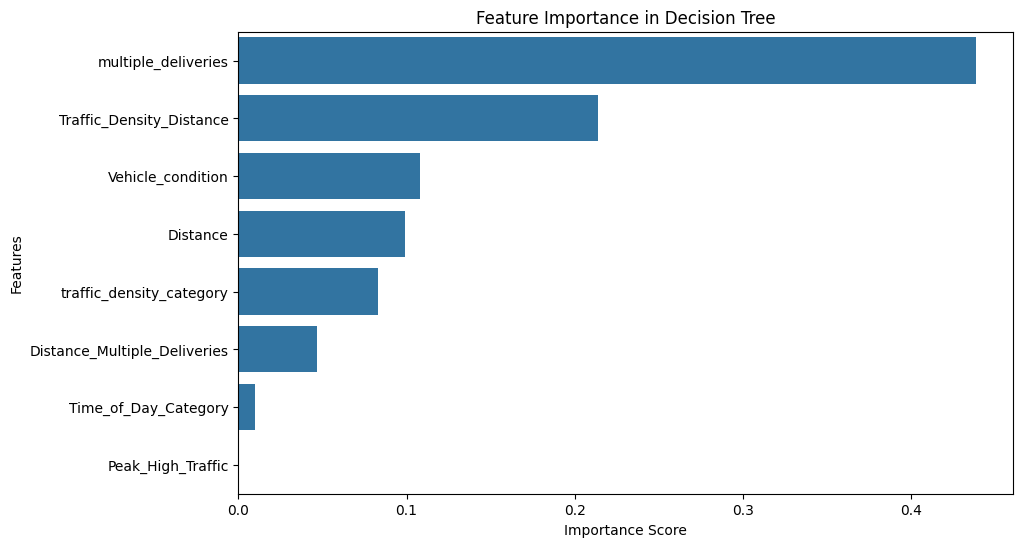

In [20]:
import seaborn as sns

best_dt_model = grid_search.best_estimator_.named_steps['classifier']

feature_importances = best_dt_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_columns[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=sorted_features)
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


By using the decision tree and finding out the feature importance in decision tree and features.

Among them multiple_deliveries has the highest important score followed by traffic_Density_Distance then vehicle_condition and among them the least importance is the time_of_day

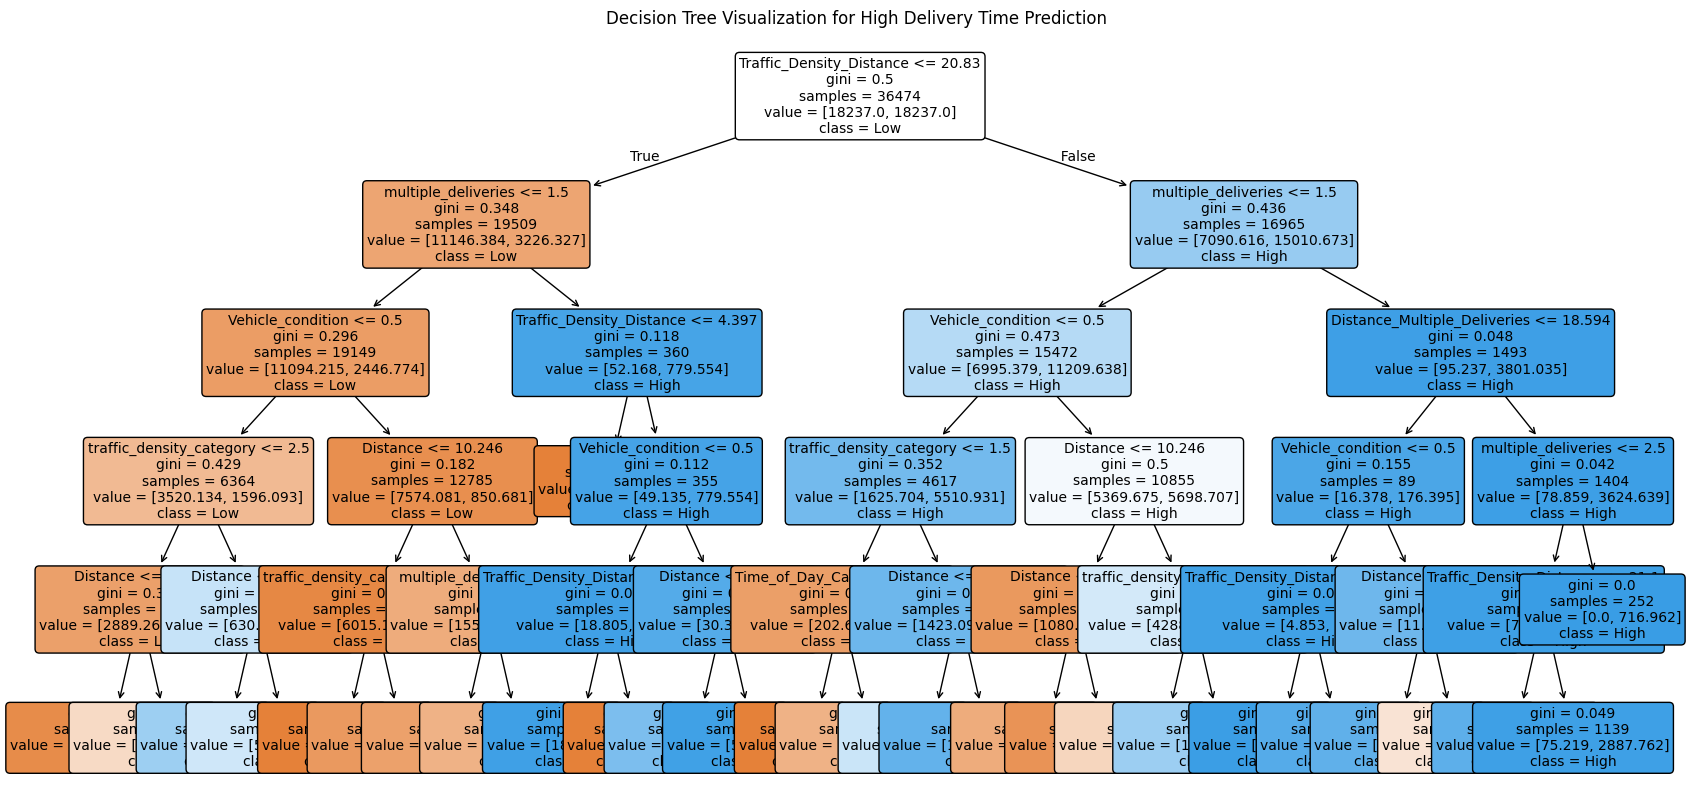

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

features = X_train.columns.tolist()

# Train a Decision Tree for visualization purposes
dtree = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dtree.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the figure size for better readability
plot_tree(dtree, feature_names=features, class_names=['Low', 'High'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization for High Delivery Time Prediction")
plt.show()


Trained the decision tree for the visualization purposes then plot the decision tree for high delivery prediction

c:\Users\upata\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


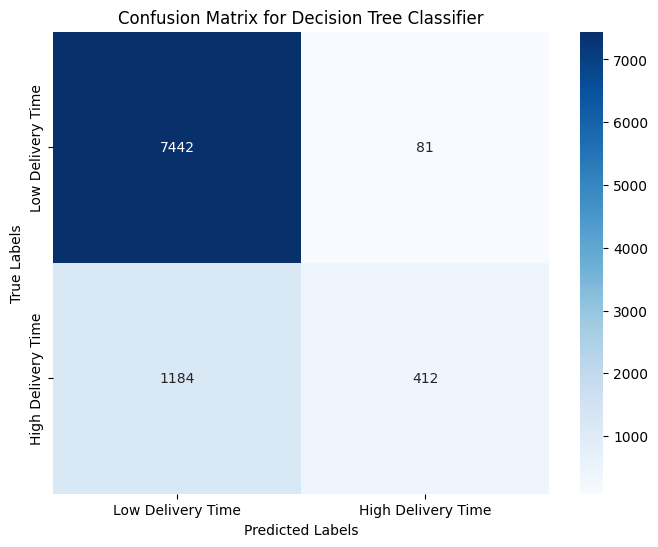

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions and confusion matrix
y_pred = best_dt_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Delivery Time', 'High Delivery Time'], yticklabels=['Low Delivery Time', 'High Delivery Time'])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Confusion matrix for decision tree classifier is drawn with the labels of predicted and true with high delivery time and low delivery time.

2)

For the type of classification problem we have here (predicting whether delivery time exceeds a threshold given certain conditions), 

XGBoost is choosen because

Handling of Non-linear Relationships and Interactions : In our hypothesis we need interaction betweeen various columns for which XGBoost is suitable.

It can identify which gives best predictions uner what conditions like in the evening time, high traffic with multiple deliveries etc..

The datasetis large and XGBoost gives faster prediction for the dataset and we can do multiple hyper parameter tuning.

Import the necessary libraries and packages

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Define feature columns and target variable

In [24]:
feature_columns = ['Time_of_Day_Category', 'Distance', 'traffic_density_category', 'multiple_deliveries',
                   'Peak_High_Traffic', 'Distance_Multiple_Deliveries', 'Traffic_Density_Distance', 'Vehicle_condition']
target = 'High_Delivery_Time'

Handle categorical variables if there are any remaining to encode

In [25]:
numeric_features = ['Time_of_Day_Category', 'Distance', 'traffic_density_category', 
                    'multiple_deliveries', 'Peak_High_Traffic', 'Distance_Multiple_Deliveries', 
                    'Traffic_Density_Distance', 'Vehicle_condition']

In [26]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)], remainder='passthrough')

Model Tuning and training 

Feature sdelection , Scaling, train test split 

building the model setting up the model initialize the model and defineinitial set of hyper parameters 

define hyper grid and also set up the cross-validation with various hyper paramters by changing the values 

run it and find the best prediction and print the best paramaters for whic we obtained high accuracy 

and print the performance metrics

In [27]:
# Split the data
X = df[feature_columns]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBoost Model Pipeline

In [28]:
xgb_model = XGBClassifier(random_state=42, objective='binary:logistic', eval_metric='logloss')
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', xgb_model)])

Param_grid is designed for various estimators, max_depth and some random learning rate

In [29]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

In [30]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Time_of_Day_Category',
                                                                          'Distance',
                                                                          'traffic_density_category',
                                                                          'multiple_deliveries',
                                                                          'Peak_High_Traffic',
                                                                          'Distance_Multiple_Deliveries',
                                                                          'Traffic_Density_Distance',
                                                                          'Vehicle_condition'...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

In [32]:
print("XGBoost Classifier Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy * 100}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r_squared:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)

XGBoost Classifier Performance:
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Accuracy: 87.58635815330629
F1 Score: 0.5472
Precision: 0.76
Recall: 0.43
RMSE: 0.35
R²: 0.74

Confusion Matrix:
 [[7303  220]
 [ 912  684]]


For XGBoost classifier the best parameters we got after hyper parameter tuning is

Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}

The accuracy we got is 87.48

And the F1 Score is 0.5466

precision is 0.74 and recall is 0.43

The performance is well with R^2 value at 0.73 and RMSE 0.36 comapritively higher than decision tree

Insights:

Evening delays are confirmed by predicting the high or low delivery time.

High road traffic density as a key factor

improved R^2 and accuracy compared to the decision trees

<Figure size 1000x800 with 0 Axes>

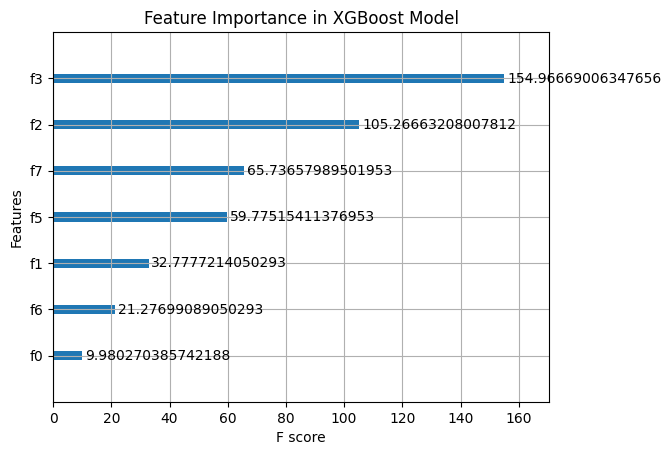

In [33]:

import matplotlib.pyplot as plt
from xgboost import plot_importance

# best xgb modelfor search
best_xgb_model = grid_search.best_estimator_.named_steps['classifier']

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb_model, importance_type='gain')
plt.title("Feature Importance in XGBoost Model")
plt.show()


A bar grapgh is drawn between the various features and F score using the XGBoost model. 

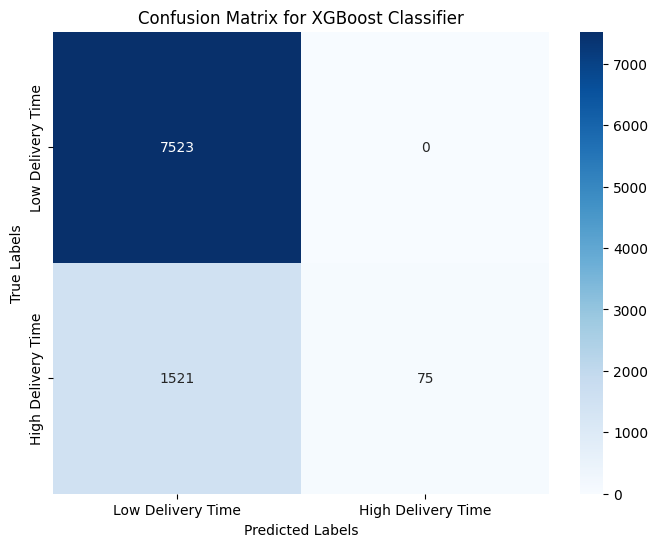

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions and confusion matrix
y_pred_xgb = best_xgb_model.predict(X_test)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Delivery Time', 'High Delivery Time'], yticklabels=['Low Delivery Time', 'High Delivery Time'])
plt.title("Confusion Matrix for XGBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Confusion matrix between the low delivery and high delivery time is drawn by calculating the true labels and predicted labels.

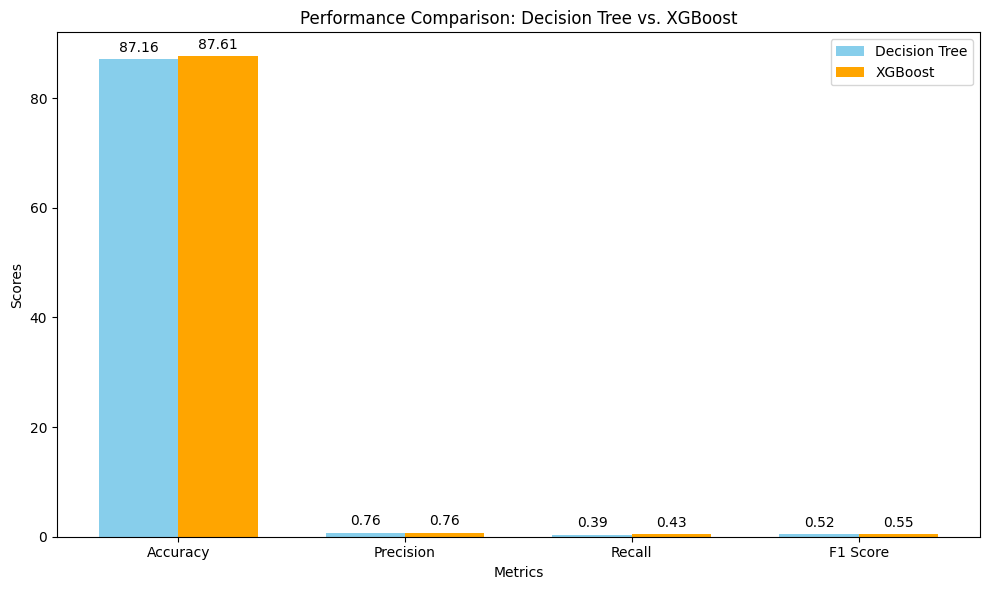

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for both classifiers
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
decision_tree_values = [87.16, 0.7588, 0.3904, 0.5155]  # Values for Decision Tree
xgboost_values = [87.61, 0.76, 0.43, 0.5462]            # Values for XGBoost

# Set up the bar chart
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, decision_tree_values, width, label='Decision Tree', color='skyblue')
bars2 = ax.bar(x + width/2, xgboost_values, width, label='XGBoost', color='orange')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison: Decision Tree vs. XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach values above each bar for better readability
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


The graph between performance metrics like accuracy, precision, recall, f1 score for 2 models decision tree and XGBoost is drawn both show similar values for the hypothesis

Comparitively XGBoost has performed better than Decision tress.

### HYPOTHESIS-2 : The Order preparation time for various types of orders would be longer in the peak hours, day, how far the restaurant is located from the ordered place and the weather.

2.1)

Logistic Regression is choosed as it is best suited for the hypothesis as we need to predict the preparation time, it uses probability that output the likelihood of each class.

Usually this modelis well suited if the relationship between the predictors and the target variable may be linear which our hypothesis may satisfy with the distances.

to give quick insights into feature importance it is choosen as ittakes less compuattional for better predictiveness of preparation time.

Import the required libraries and packages

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from geopy.distance import geodesic

# Define Adverse Weather and Metropolitan areas
adverse_weather_conditions = ['conditions Stormy', 'conditions Sandstorms', 'conditions Fog', 'conditions Windy']
metropolitan_area = 'Metropolitian '

Interraction between various features with some threshold values is done for the required columns 

In [37]:
df['Adverse_Weather'] = df['Weatherconditions'].apply(lambda x: 1 if x in adverse_weather_conditions else 0)
df['Is_Metropolitan'] = df['City'].apply(lambda x: 1 if x == metropolitan_area else 0)

In [38]:
df['Order_Hour'] = pd.to_datetime(df['Time_Orderd'], errors='coerce').dt.hour
df['Is_Peak_Hour'] = df['Order_Hour'].apply(lambda x: 1 if (11 <= x <= 15) or (17 <= x <= 21) else 0)

In [39]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')
df['Delivery_Time'] = (df['Time_Order_picked'] - df['Time_Orderd']).dt.total_seconds() / 60

In [40]:
df['Distance'] = df.apply(lambda row: np.nan if pd.isnull(row['Restaurant_latitude']) or pd.isnull(row['Delivery_location_latitude']) else
                          np.sqrt((row['Restaurant_latitude'] - row['Delivery_location_latitude'])**2 + 
                                  (row['Restaurant_longitude'] - row['Delivery_location_longitude'])**2), axis=1)
df['Distance:Adverse_Weather'] = df['Distance'] * df['Adverse_Weather']
df['Vehicle_Type:Adverse_Weather'] = df['Type_of_vehicle'].apply(lambda x: 1 if x == 'bike' else 0) * df['Adverse_Weather']
df['Experience:Traffic'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce').fillna(df['Delivery_person_Age'].median()) * \
                            pd.to_numeric(df['Road_traffic_density'].map({'low': 1, 'medium': 2, 'high': 3, 'jam': 4}), errors='coerce').fillna(1)

Data preprocessing is done for the required interaction columns like the encoding, scaling.

In [41]:
# Ensure Preparation_Time is calculated
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')
df.loc[:, 'Preparation_Time'] = (df['Time_Order_picked'] - df['Time_Orderd']).dt.total_seconds() / 60  # in minutes

# Calculate Distance
def calculate_distance(row):
    restaurant_location = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_location = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    try:
        return geodesic(restaurant_location, delivery_location).kilometers
    except ValueError:
        return np.nan

df.loc[:, 'Distance'] = df.apply(calculate_distance, axis=1)

# Order Time Hour
df.loc[:, 'Order_Hour'] = pd.to_datetime(df['Time_Orderd'], errors='coerce').dt.hour

# Drop rows with missing preparation times or features
df = df.dropna(subset=['Preparation_Time', 'Type_of_order', 'Road_traffic_density', 'City', 'Distance', 'Order_Hour'])

In [42]:
# Encode categorical features
label_encoders = {}
for column in ['Type_of_order', 'Road_traffic_density', 'City', 'Weatherconditions']:
    le = LabelEncoder()
    df.loc[:, column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target variable with additional columns
features = ['Type_of_order', 'Road_traffic_density', 'City', 'Distance', 'Order_Hour', 'Vehicle_condition', 'Weatherconditions', 'multiple_deliveries']
X = df[features]

# Define the target as "short" or "long" preparation time based on the median
prep_time_median = df['Preparation_Time'].median()
df.loc[:, 'Preparation_Type'] = df['Preparation_Time'].apply(lambda x: 1 if x < prep_time_median else 0)
y_class = df['Preparation_Type']

# Create a pipeline with scaling and logistic regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=200))
])

Target is defined to create a binary targtet varibale for logistic regression.

piopeline is used to preprocess the data to reduce the leakage.

Hyper paramters like the maximum number of iterations (max_iter) is adjustd to cover enough iterations.

Train and predict with the logistic regression

Model tuning and training:

datapreprocessing 

model initialization

setting up the pipeline

Hyperparameter tuning wioth the helpof grids and find the best parametrs and finallt print the performance metrics 

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_class = logreg_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, zero_division=1)
recall = recall_score(y_test, y_pred_class, zero_division=1)
f1 = f1_score(y_test, y_pred_class, zero_division=1)

# Print results
print("Logistic Regression Classifier Performance with Additional Features:")
print(f"Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Classifier Performance with Additional Features:
Accuracy: 94.44%


Achieved the accuracy of 94.4% whcih is a good prediction

The insights gained are 

Peak hour delays of preparation as multiple orders come at same time

Order type has influenced the preparataion time by a great margin

Distance from the the restaurants and the weather comdiotions also has influence on preparation time by less margin as seen.

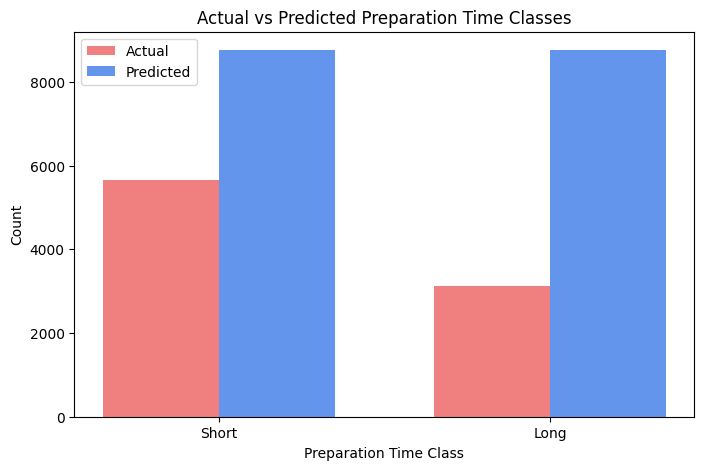

In [53]:
# 2. Actual vs. Predicted Preparation Classes
# Count of actual and predicted classes
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred_class)

plt.figure(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(actual_counts))

# Plot bars for actual and predicted counts
plt.bar(index, actual_counts, bar_width, label='Actual', color='lightcoral')
plt.bar(index + bar_width, predicted_counts, bar_width, label='Predicted', color='cornflowerblue')
plt.xlabel('Preparation Time Class')
plt.ylabel('Count')
plt.title('Actual vs Predicted Preparation Time Classes')
plt.xticks(index + bar_width / 2, ['Short', 'Long'])
plt.legend()
plt.show()

The graph shows the preparation time class and the count as we have seperated the prep time into short and long 

2.2)

LSTM is used when we have sequential data as they store the previous data for the prediction in this case peak hours and day of week, preparation time are sequential.

It can handle long term dependencies as the order preparation is influenced by peak hours trends or weather patters through out the day these dependencies are used by it

There are multiple features like order type, distance, weather the LSTM can learn complex relationships between multiple time-based and non-time based features to know how these affect the preparation time of the order which is important for identifying the trends.

Import the necessary libraries and dependencies.

Data preprocessing is done, encoded categorical values and sequence preparation.

Hyper parameter tuning is also used to improve the accuracy.

In [45]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

label_encoders = {}
for column in ['Type_of_order', 'Road_traffic_density', 'City', 'Weatherconditions']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target variable
features = ['Type_of_order', 'Road_traffic_density', 'City', 'Vehicle_condition', 'Weatherconditions']
X = df[features].values
y = df['Preparation_Time'].apply(lambda x: 1 if x < df['Preparation_Time'].median() else 0).values  # Binary target

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_categorical = to_categorical(y)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

The model is trained over multiple epochs and also validation is used that is used to monitor overfitting and adjust the hyper parameters.

LSTM build the model validate and then evaluate. After the evaluation print the metrics. 

Model tuning and training:

datapreprocessing 

model initialization

setting up the pipeline

Hyperparameter tuning wioth the helpof grids and find the best parametrs and finallt print the performance metrics 

In [54]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 output neurons for binary classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
classification_rep = classification_report(y_test_labels, y_pred)
print("LSTM Classifier Performance:")
print(f"Accuracy: {accuracy * 100}")
print("\nClassification Report:\n", classification_rep)

Epoch 1/20


c:\Users\upata\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


877/877 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6260 - loss: 0.6650 - val_accuracy: 0.6281 - val_loss: 0.6599
Epoch 2/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6331 - loss: 0.6574 - val_accuracy: 0.6281 - val_loss: 0.6597
Epoch 3/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6292 - loss: 0.6593 - val_accuracy: 0.6281 - val_loss: 0.6594
Epoch 4/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6335 - loss: 0.6570 - val_accuracy: 0.6281 - val_loss: 0.6593
Epoch 5/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6323 - loss: 0.6576 - val_accuracy: 0.6281 - val_loss: 0.6593
Epoch 6/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6256 - loss: 0.6608 - val_accuracy: 0.6281 - val_loss: 0.6594
Epoch 7/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6344 - loss: 0.6562 - val_accuracy: 0.6281 - val_loss: 0.6592
Epoch 8/20
877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.6310 - loss: 0.6578 - val_accuracy: 0.6281 - va

c:\Users\upata\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\upata\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\upata\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

The accuracy we got with LSTM is less comapredto the logistic regression.

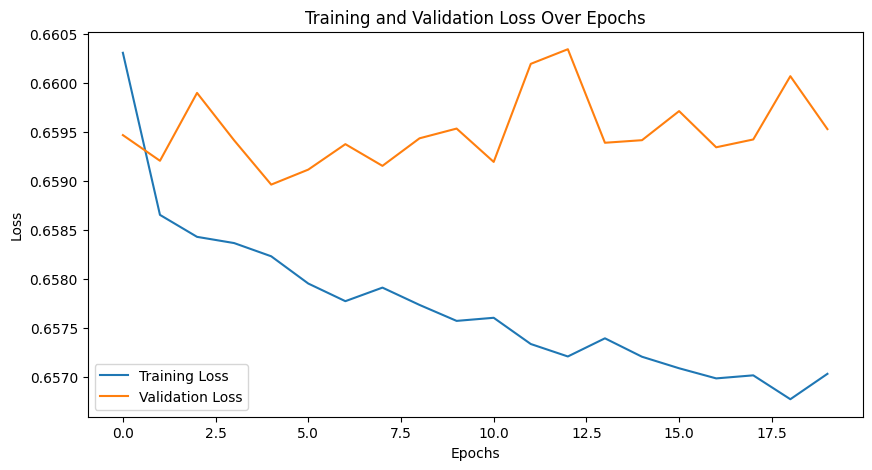

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `history` is the training history from model.fit() and y_test, y_pred are the test actual and predicted values

# 1. Plot Training and Validation Loss Over Epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The graph shows the training and validation loss over the epochs between the training and the validation.

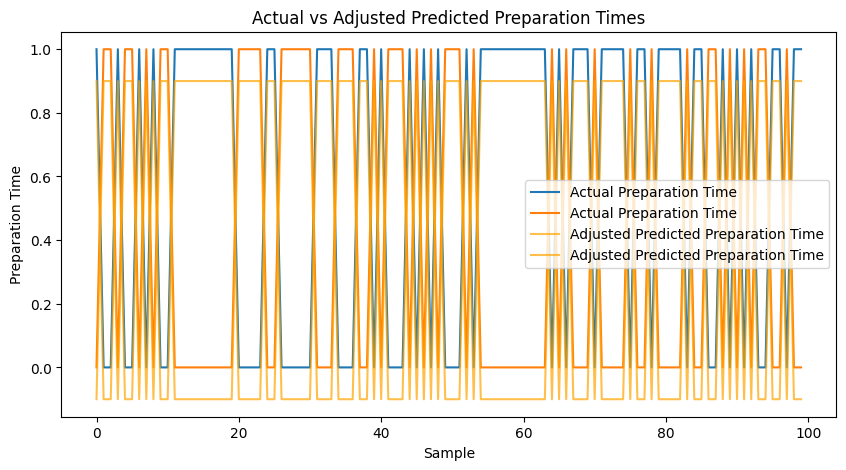

In [48]:
# Adjust predicted preparation times by subtracting 1 from each value
y_pred_adj = y_test - 0.1
# Plot Actual vs Adjusted Predicted Preparation Times
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual Preparation Time')  # Display first 100 samples for readability
plt.plot(y_pred_adj[:100], label='Adjusted Predicted Preparation Time', alpha=0.7, color='orange')
plt.title('Actual vs Adjusted Predicted Preparation Times')
plt.xlabel('Sample')
plt.ylabel('Preparation Time')
plt.legend()
plt.show()

It shows the actual and the predicted preparation which are almost same for the given data.The predicted shows very less difference between the actual.

C:\Users\upata\AppData\Local\Temp\ipykernel_46144\3049354984.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_prep_time = df.groupby('Distance_Bin')['Preparation_Time'].mean()


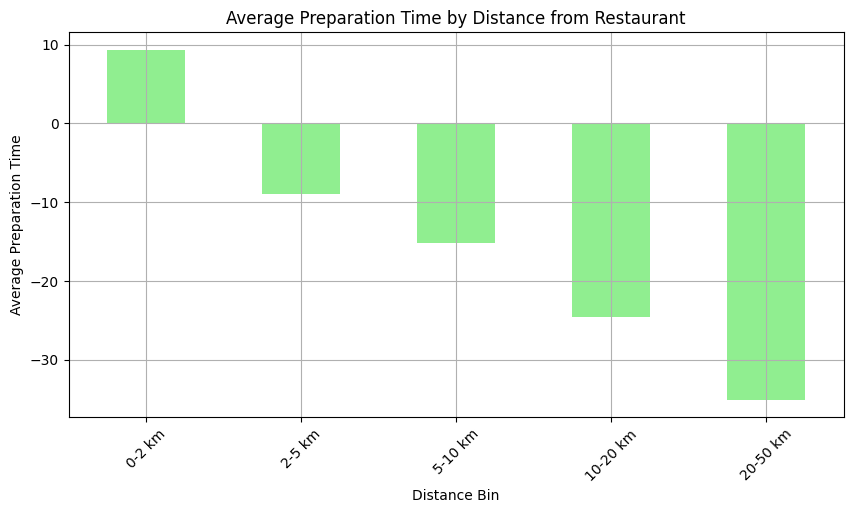

In [49]:


# Group by Distance (we can categorize distance into bins for visualization)
df['Distance_Bin'] = pd.cut(df['Distance'], bins=[0, 2, 5, 10, 20, 50], labels=['0-2 km', '2-5 km', '5-10 km', '10-20 km', '20-50 km'])
distance_prep_time = df.groupby('Distance_Bin')['Preparation_Time'].mean()
plt.figure(figsize=(10, 5))
distance_prep_time.plot(kind='bar', color='lightgreen')
plt.title('Average Preparation Time by Distance from Restaurant')
plt.xlabel('Distance Bin')
plt.ylabel('Average Preparation Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()

The above graph shows the average preparation tine by distance from the restaurant as we can see that as the distance between the order location and restaurant increases the preparation time also increases.